# Ising Model - 2D : Monte Carlo Simulation

First of all we import the required libraries:

In [50]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np
import seaborn as sns
sns.set()

### Global parameters

Then we set some global variables:

In [51]:
Kb = 1.0
JJ = 1.0
mu = 1.0

### Cold Start and Hot Start

Before begining simulation, if we select all spin up or all spin down then it is called cold configuration.

In [52]:
def cold_start(L):
    U = [[1.0 for k in range(L)]for l in range(L)]
    return U   

We can make a plot of this cold configuration by the help of Uplotter :

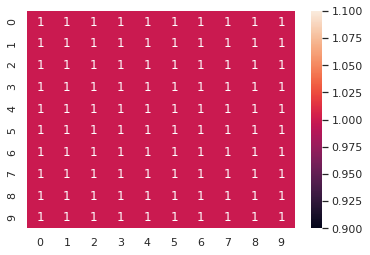

In [53]:
CU = cold_start(10)
sns.heatmap(CU,annot =True)

 if we select spin randomly up or down then it is called cold configuration

In [54]:
def hot_start(L): 
    U = [[0.0 for i in range(L)]for j in range(L)]
    for i in range(L):
          for j in range(L):
            t = random.sample([-1,1],1)
            U[i][j] = t[0]  
    return U 

Similarly we can plot thishot configuration as well.

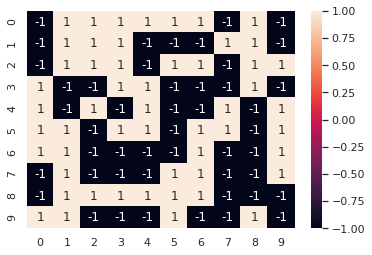

In [55]:
HU = hot_start(10)
sns.heatmap(HU,annot =True)

### Hamiltonian

Hamiltonian of  L by L lattice is given by

\\( H = - J \sum_{i\neq j} S_{i}S_{j} - \mu B \sum_{i} S_{i} \\)

In [56]:
def Hamiltonian(U,B):
    H = 0.0
    L = len(U)
    for i in range(L):
        for j in range(L):
                
            ni = 0;nj =0;
            if i == 0: ni = L
            if j == 0: nj = L
           
            H = H -  0.5*JJ*U[i][j]*(U[i][(j-1)+nj] \
                        + U[(i+1)%L][j] \
                        + U[i][(j+1)%L] \
                        + U[(i-1)+ni][j])  - mu*B*U[i][j]
    return H

One can check what are hamiltonian for hot and cold start:

In [57]:
Hamiltonian(CU, B=1.0)

-300.0

In [58]:
Hamiltonian(HU, B=0)

-8.0

### Mangnetization

One can calculate magnetization by simply taking average over all spins:

In [ ]:
def magnetization(U):
    return np.array(U).sum()/float(len(U)*len(U))          

In [ ]:
magnetization(HU)

0.02

In [ ]:
magnetization(CU)

1.0

### Spin Flipper

In [59]:
def ld(k,L):
    if k == 0:
        return L
    else: return 0

In [60]:
def spin_flipper(U,B, printkey):
        L = len(U)
        
        i = random.randint(0, L-1) 
        j = random.randint(0, L-1)
       
        if printkey ==1:print("flipped at", i,j)
            
        U[i][j] = -U[i][j]
       
           
        dH =  -2.0*(JJ*U[i][j]*(U[i][(j-1)+ld(j,L)] \
                            + U[(i+1)%L][j] \
                            + U[i][(j+1)%L] \
                            + U[(i-1)+ld(i,L)][j])  - mu*B*U[i][j] )  
        
        return U,dH,i,j 

### Thermalization

In [61]:
def Thermalization(U,T,nrun,printkey) :
        M = [0.0 for k in range(nrun)]
        irun = 0       
        #B = 1
        HH = [0.0 for k in range(nrun)]
       
        while irun < nrun:
                    V = U
                    w = magnetization(U)
                    h = Hamiltonian(U,B)
                    
                    U,dH,p,q = spin_flipper(U,B,printkey)
                   
                   
                    if dH < 0:
                        
                        if printkey ==1: print(irun, "E decreased! You are accepted !",dH)
                            
                        M[irun] = magnetization(U)
                        HH[irun] = Hamiltonian(U,B)
                       
                    else:
                        
                        if printkey ==1:print(irun, "E increased!",dH)
                            
                        frac = math.exp(-dH/(Kb*T))
                        b = random.uniform(0.0,1.0)
                            
                        if printkey ==1:print("frac =",frac,"b=",b,"dH = ",dH)
                                
                        if  b < frac:
                                    
                            if printkey ==1:print(irun, " You Lucky!")
                                
                            M[irun] = magnetization(U)
                            HH[irun] = Hamiltonian(U,B)
                             
                        else:
                            if printkey ==1: print(irun, "Loser!")
                            if printkey ==1: print("spin restablished at",p,q)
                            U[p][q] = -U[p][q]
                            M[irun] = w 
                            HH[irun] = h
                           
                            
                    for i in range(L):
                        for j in range(L):
                            if U[i][j] != V[i][i]:
                                 if printkey ==1: print("Warning!spin is changed!", i,j) 
                            
                    
                    
                    
                    if printkey ==2 : print(irun, M[irun])   
                    irun = irun +1
        return M,U,HH

Lets print out some measurements of m

We can plot both run with hot and cold start together:

### Phase Transition curves at increasing B 

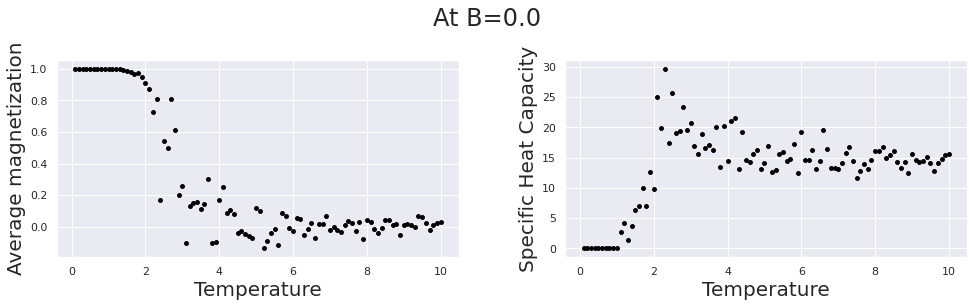

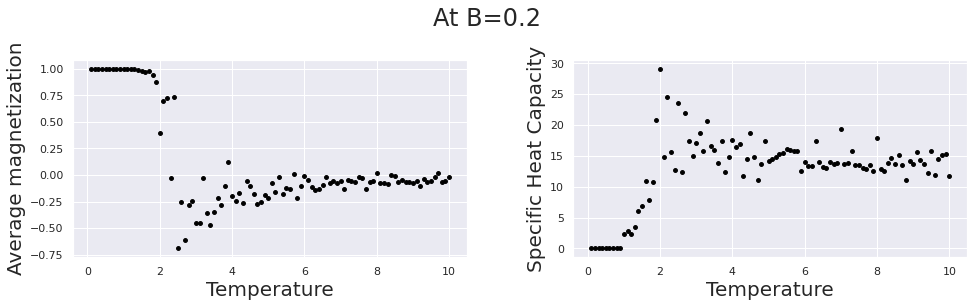

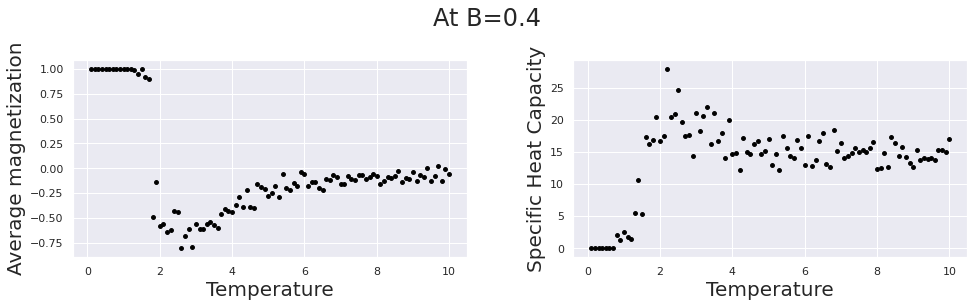

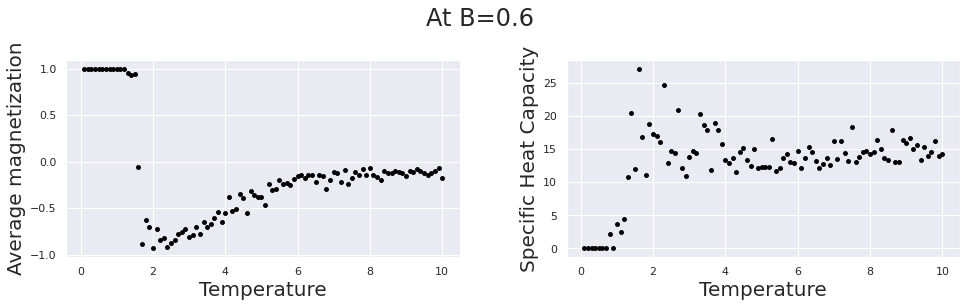

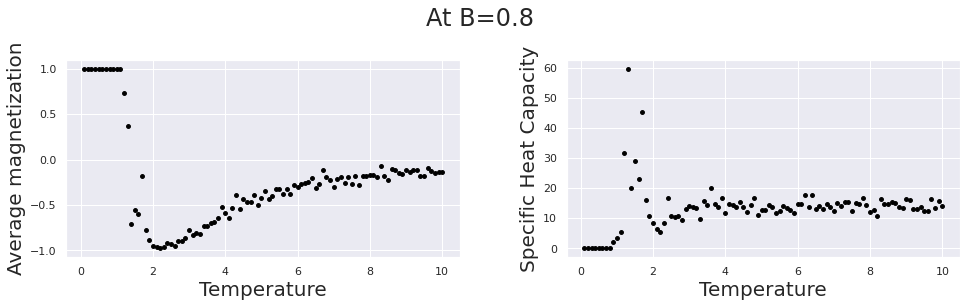

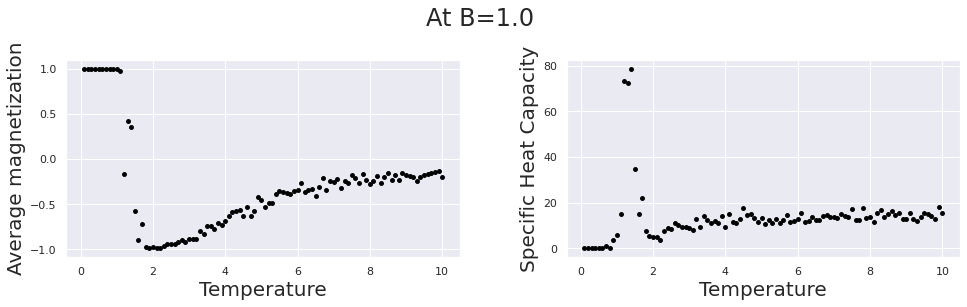

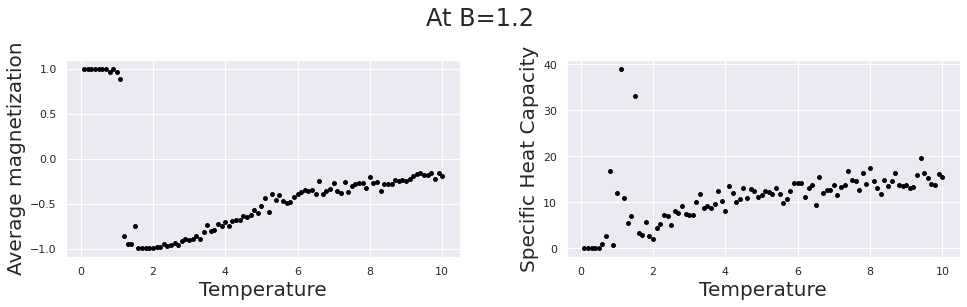

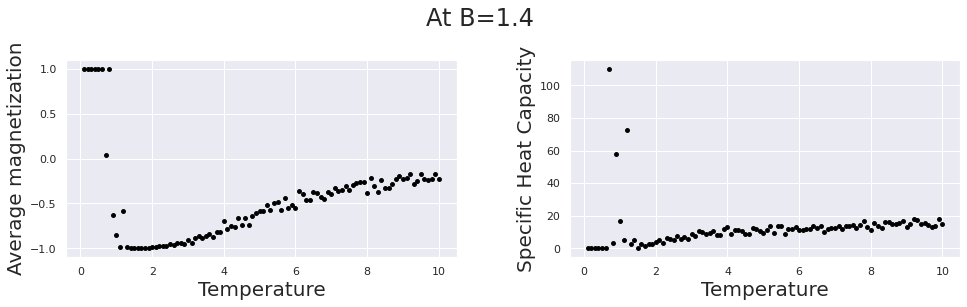

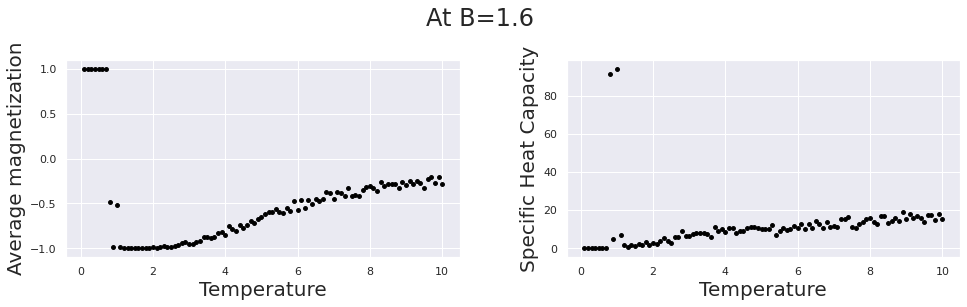

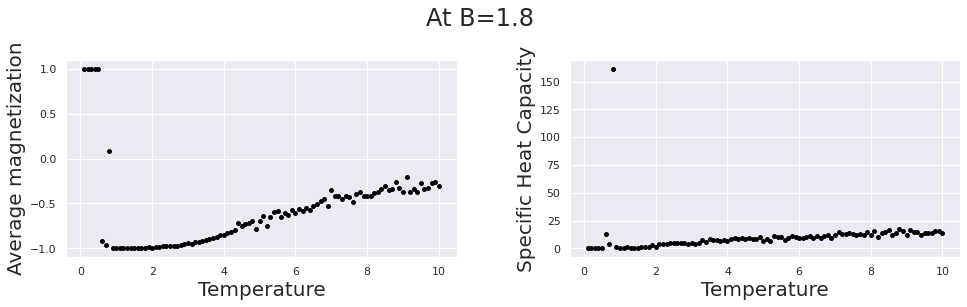

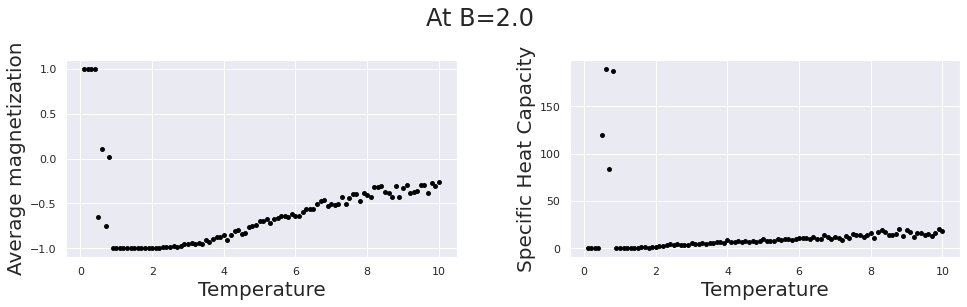

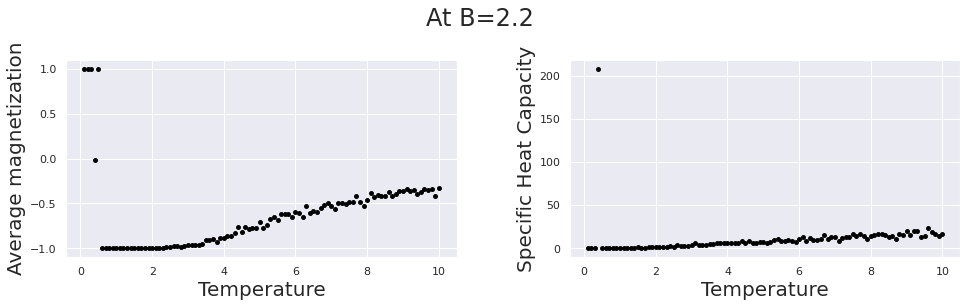

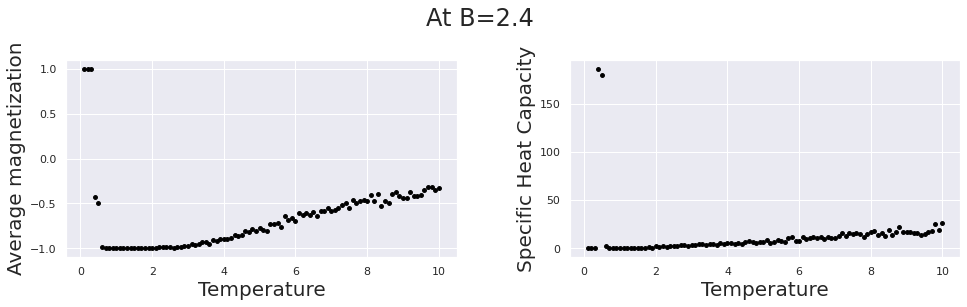

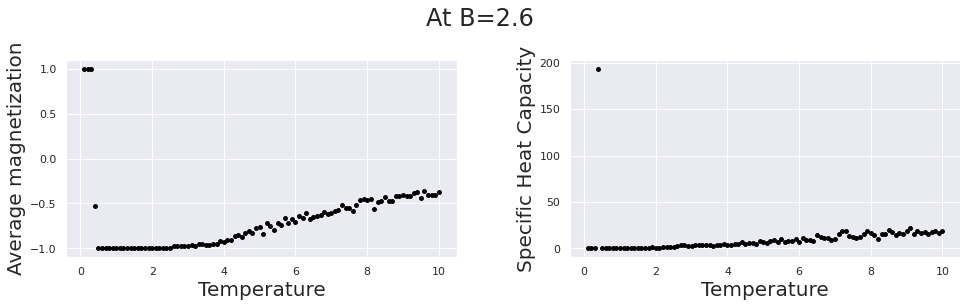

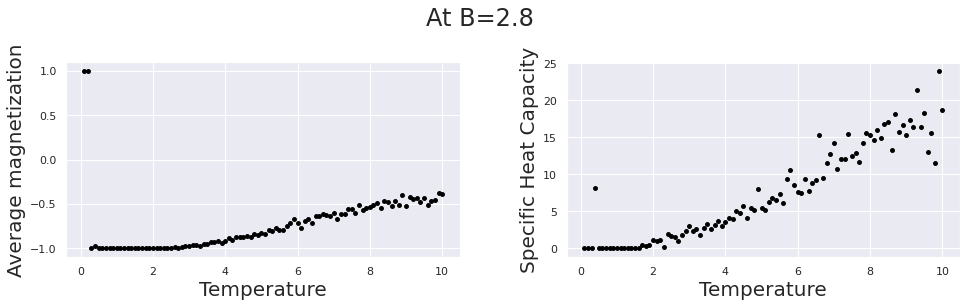

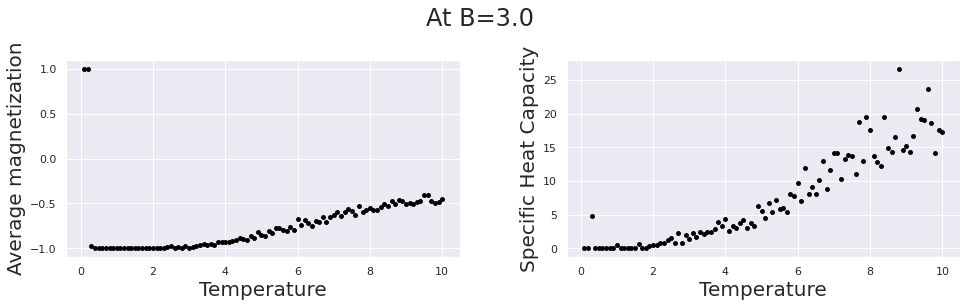

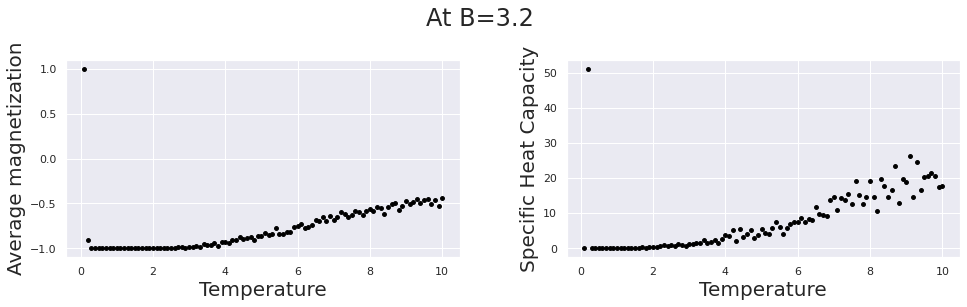

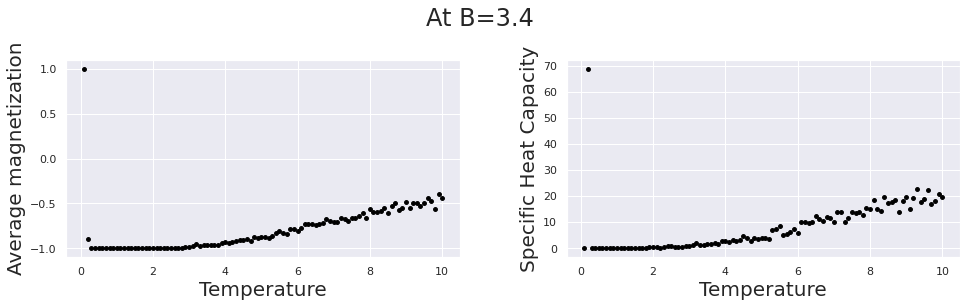

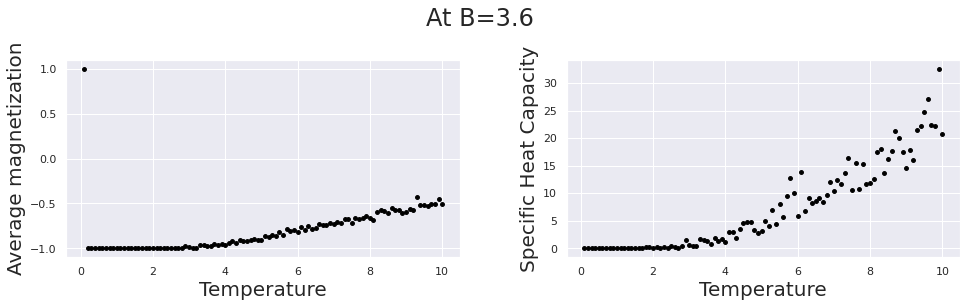

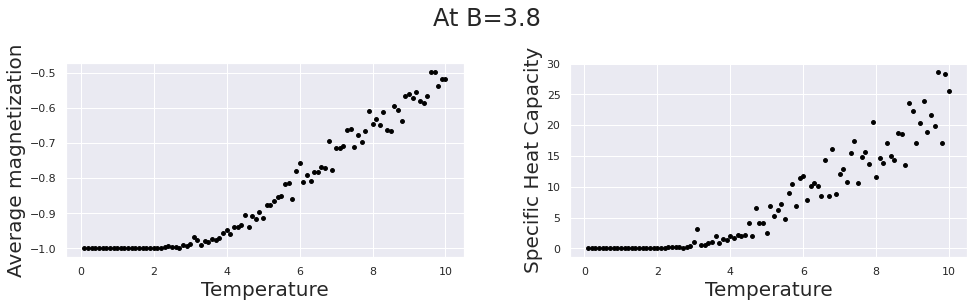

In [73]:
for counter in range(0,20):
    L = 10
    nrun = 3000
    Tn = 100
    avm = []
    stdh = []
    KT = []

    for t in range(1,Tn+1):
            T = 0.1*t
            KT.append(T)
            U = cold_start(L)
            B=counter/5
            M,U,HH = Thermalization(U,T,nrun,0)
            nM = M[1000:nrun-1]
            nH = HH[1000:nrun-1]
            stdh.append(np.std(nH))
            avm.append(np.mean(nM))
    
    f = plt.figure(figsize=(15,5))
    plt.suptitle('At B={}'.format(B),fontsize='24')
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.set_xlabel("Temperature",fontsize='20')
    ax.set_ylabel("Average magnetization",fontsize='20')

    ax2.set_xlabel("Temperature",fontsize='20')
    ax2.set_ylabel("Specific Heat Capacity",fontsize='20')

    ax.scatter(KT,avm,s=15,color="black")
    ax2.scatter(KT,stdh,s=15,color="black")
    
    plt.tight_layout(5)
    plt.show() 
    

Here goes same code at higher B

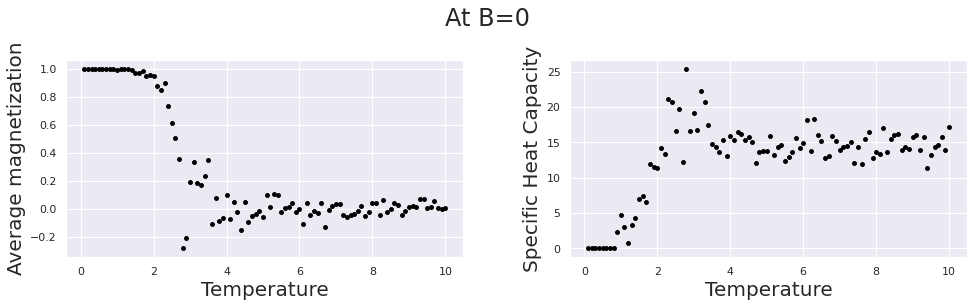

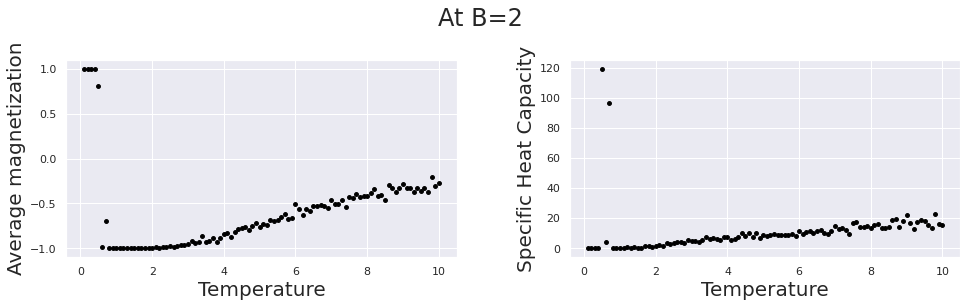

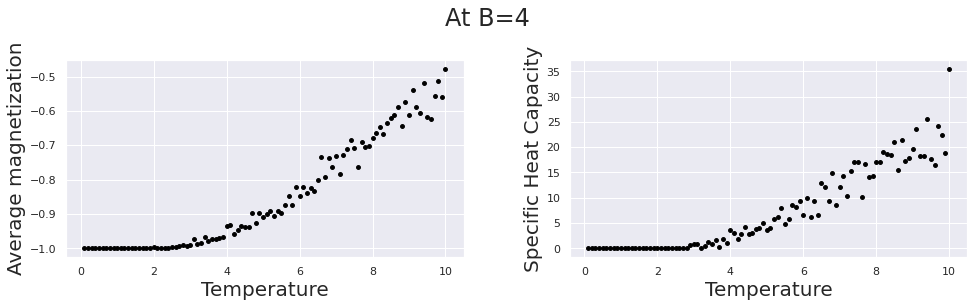

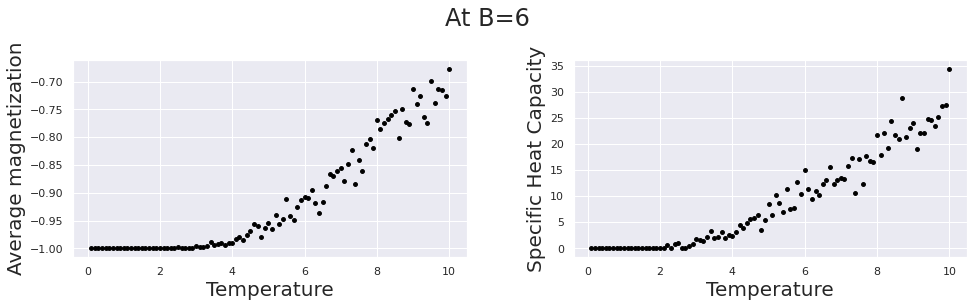

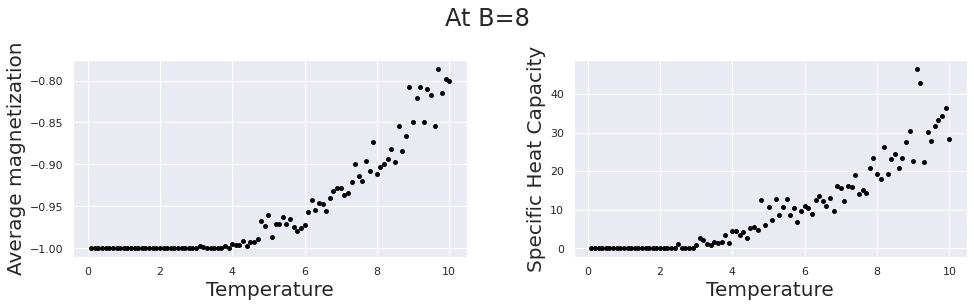

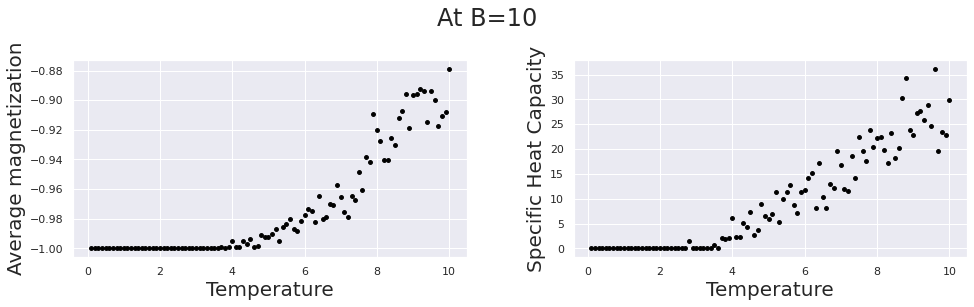

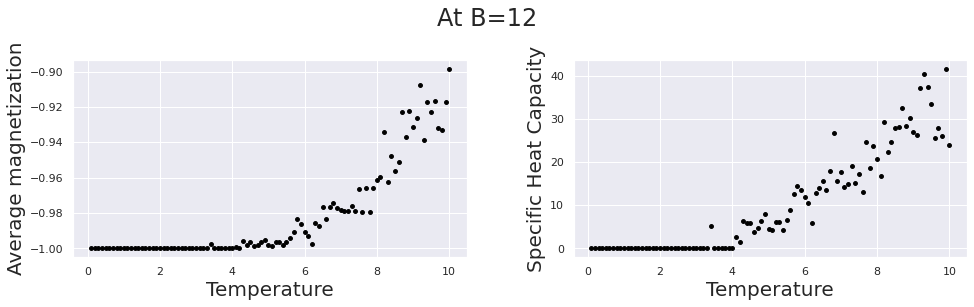

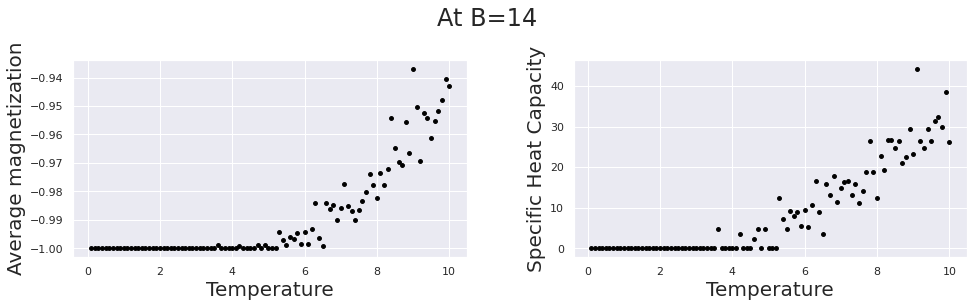

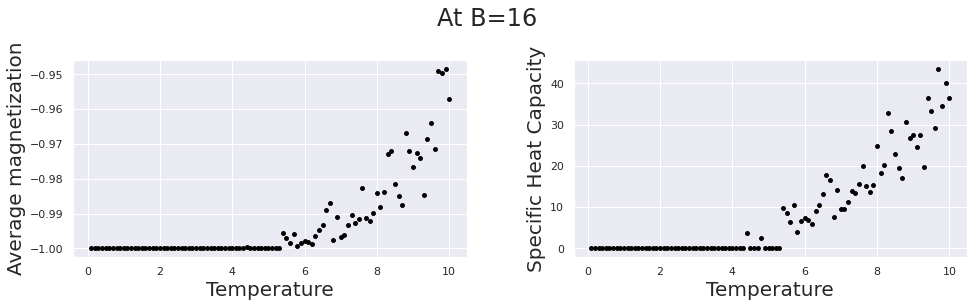

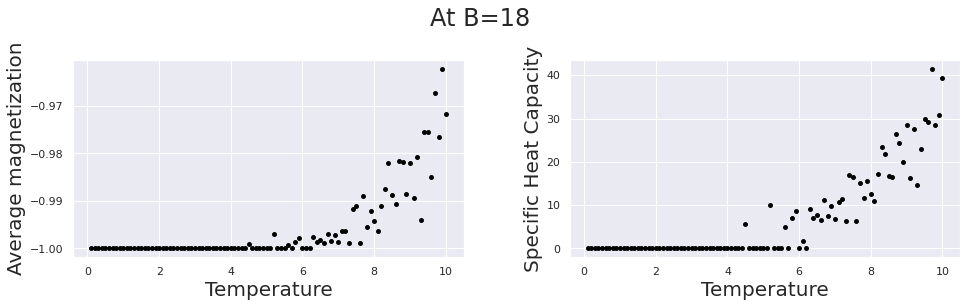

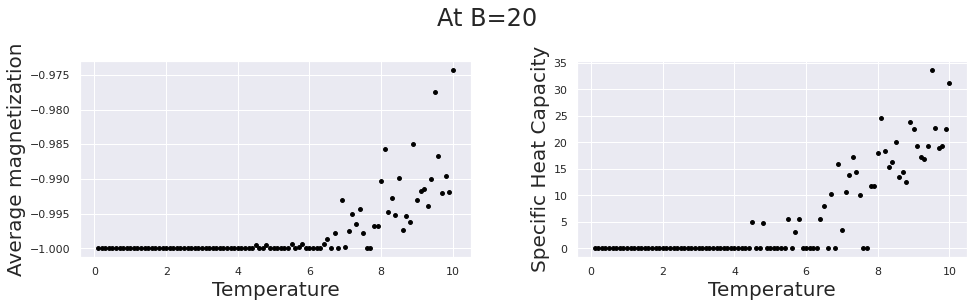

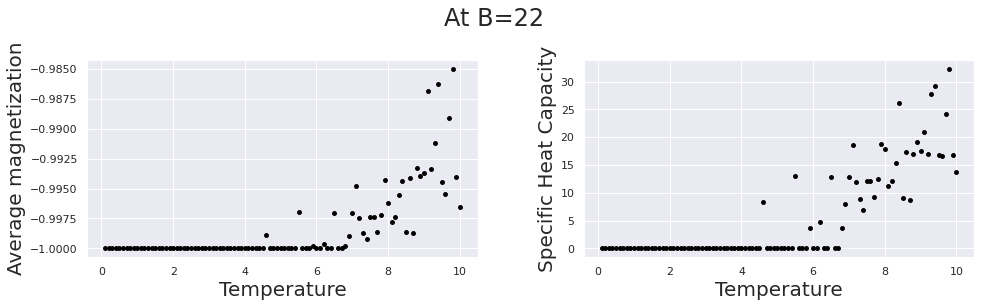

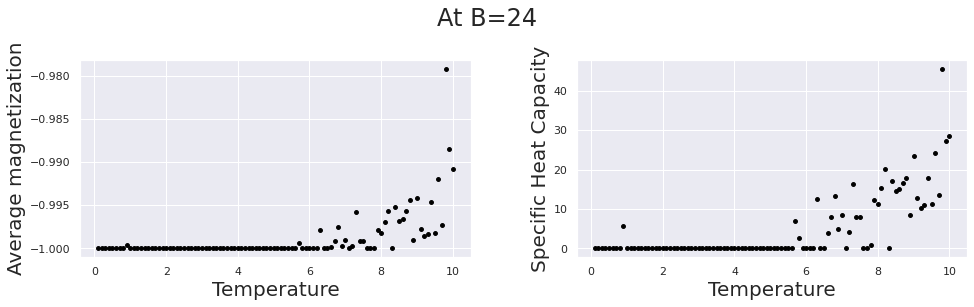

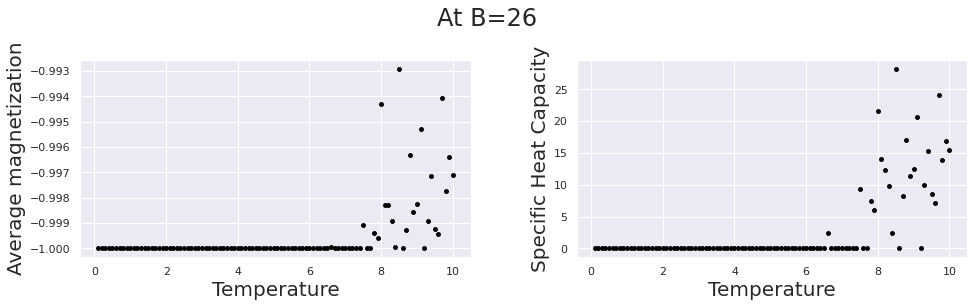

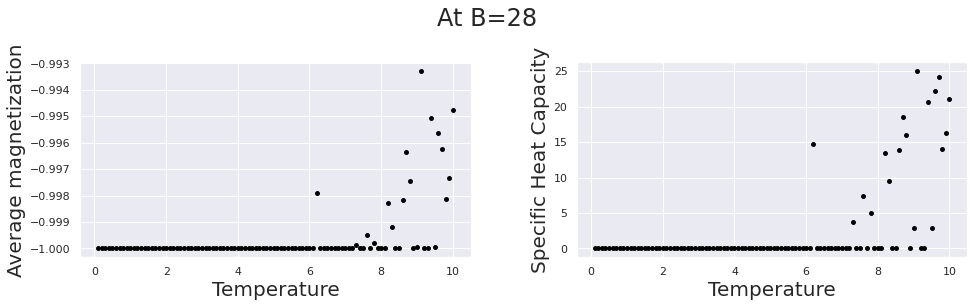

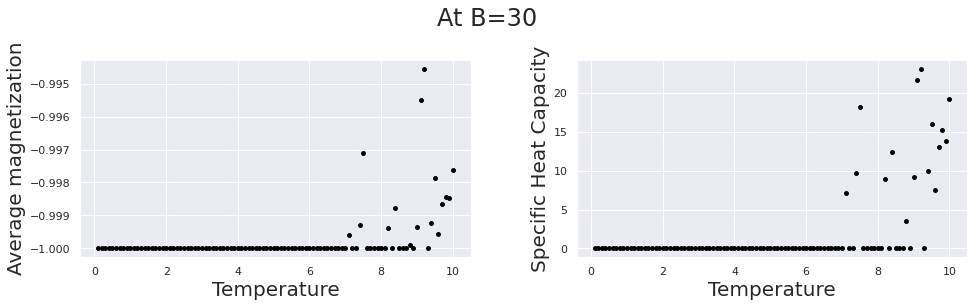

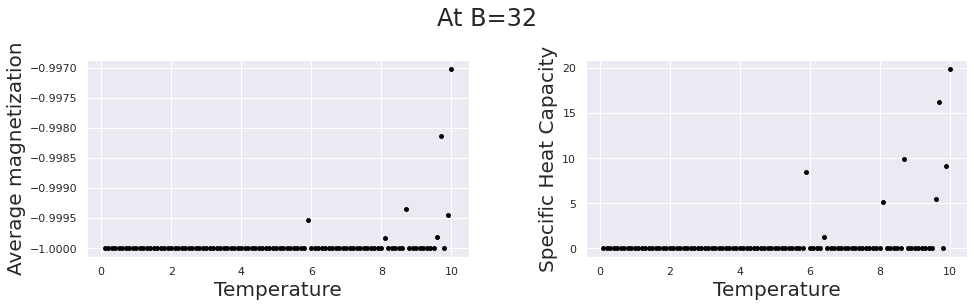

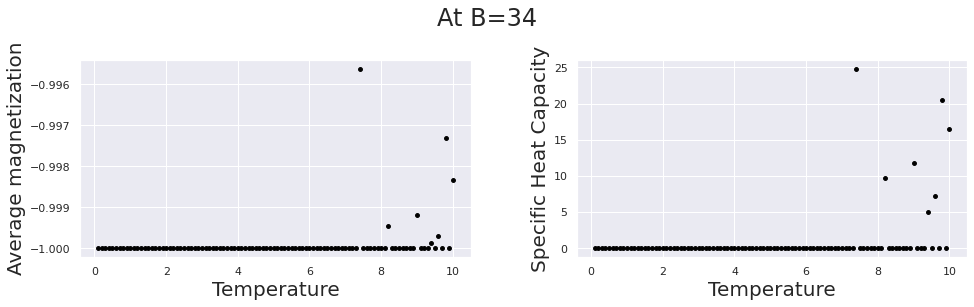

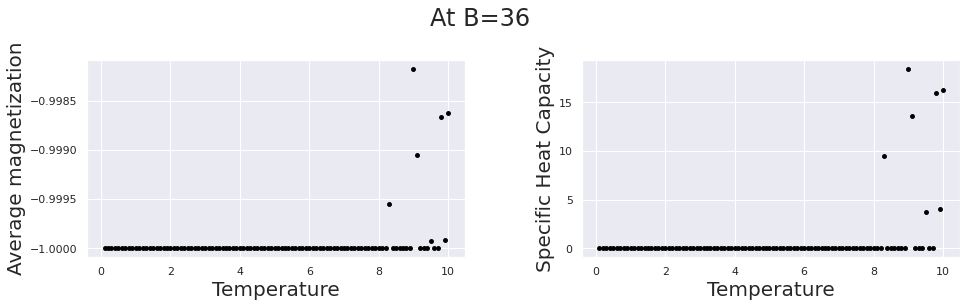

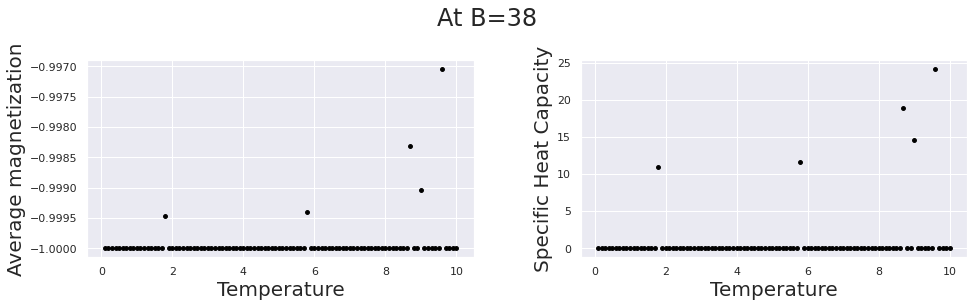

In [74]:
for counter in range(0,20):
    L = 10
    nrun = 3000
    Tn = 100
    avm = []
    stdh = []
    KT = []

    for t in range(1,Tn+1):
            T = 0.1*t
            KT.append(T)
            U = cold_start(L)
            B=counter*2
            M,U,HH = Thermalization(U,T,nrun,0)
            nM = M[1000:nrun-1]
            nH = HH[1000:nrun-1]
            stdh.append(np.std(nH))
            avm.append(np.mean(nM))
    
    f = plt.figure(figsize=(15,5))
    plt.suptitle('At B={}'.format(B),fontsize='24')
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.set_xlabel("Temperature",fontsize='20')
    ax.set_ylabel("Average magnetization",fontsize='20')

    ax2.set_xlabel("Temperature",fontsize='20')
    ax2.set_ylabel("Specific Heat Capacity",fontsize='20')

    ax.scatter(KT,avm,s=15,color="black")
    ax2.scatter(KT,stdh,s=15,color="black")
    
    plt.tight_layout(5)
    plt.show() 
    

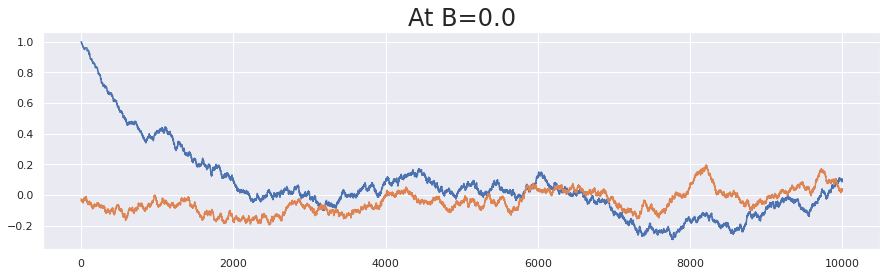

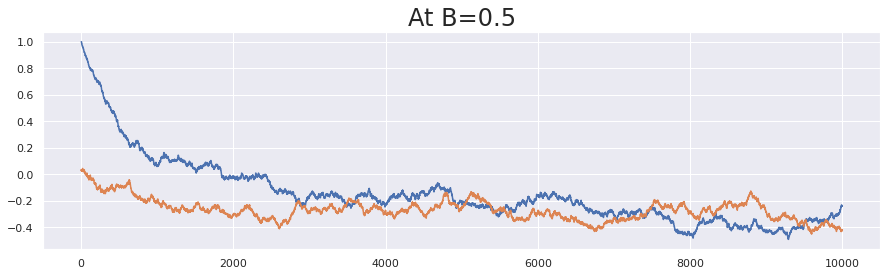

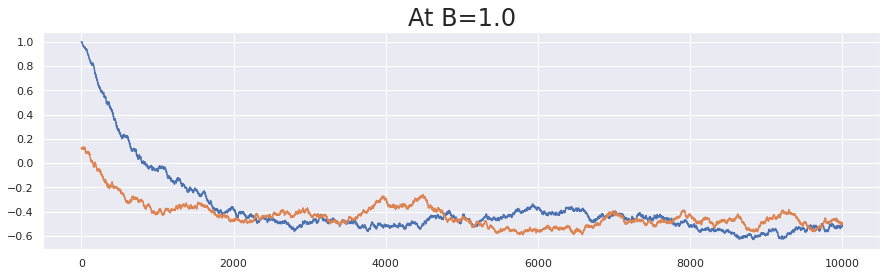

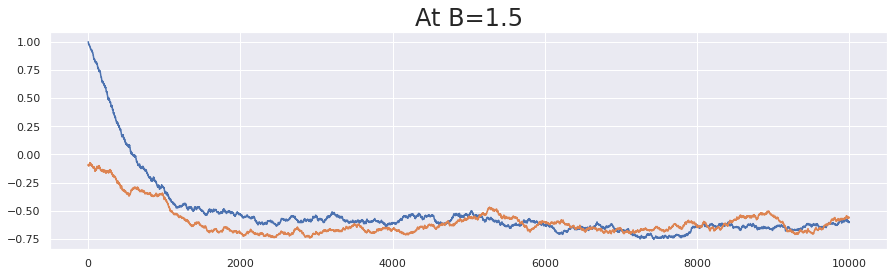

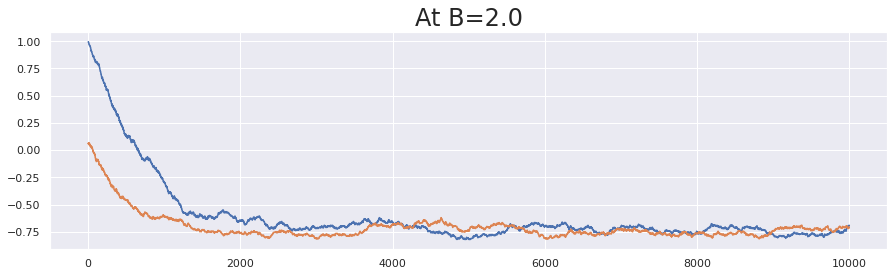

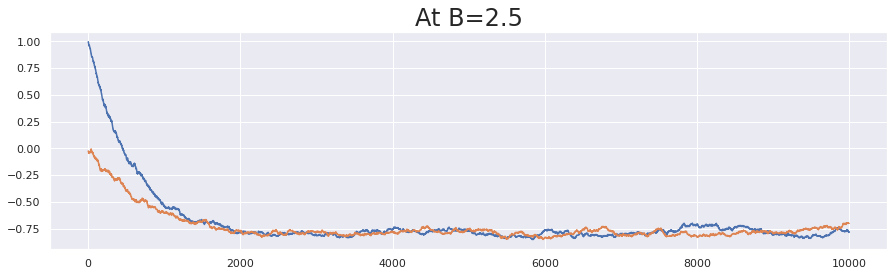

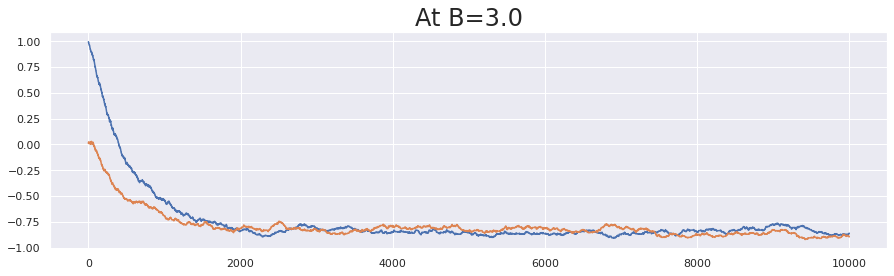

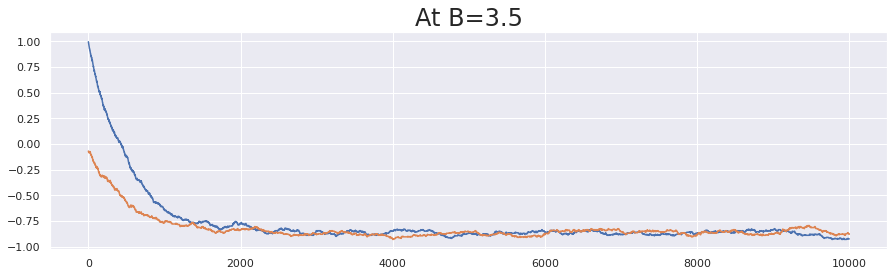

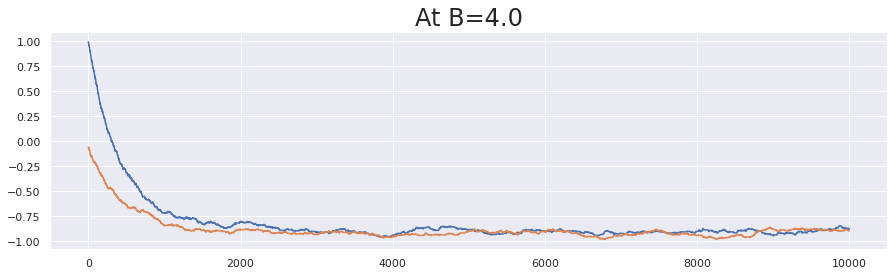

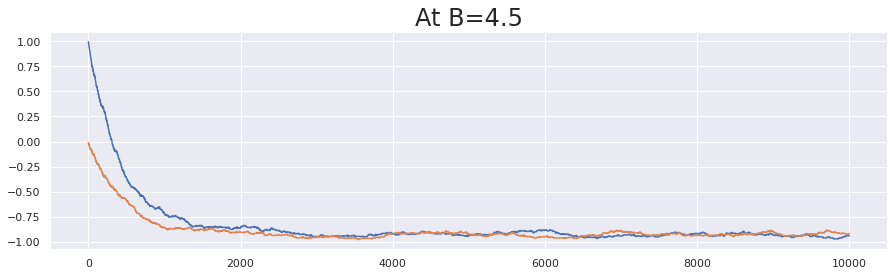

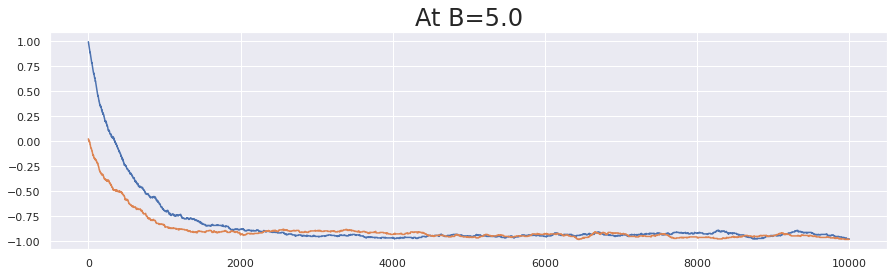

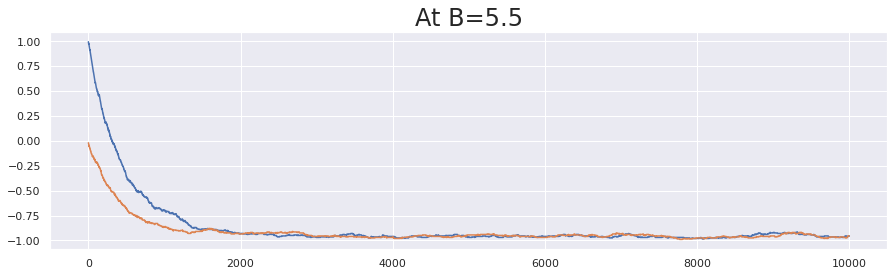

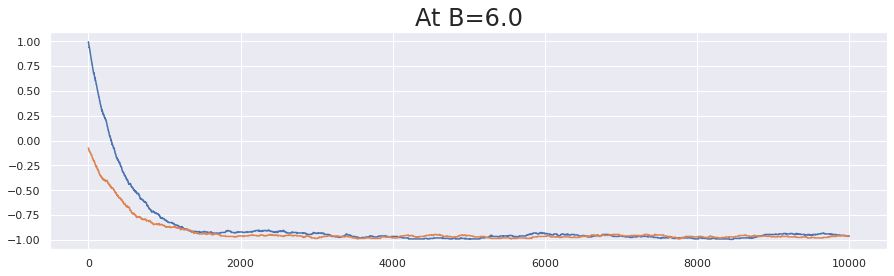

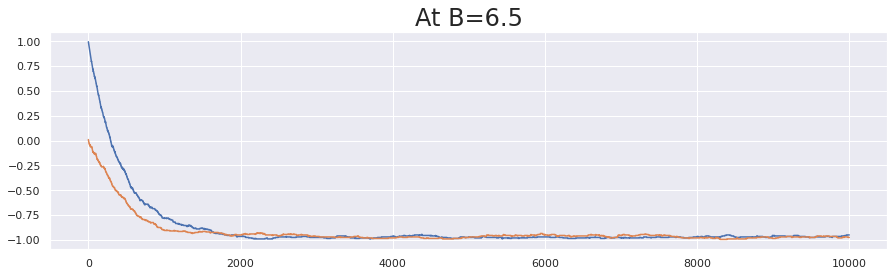

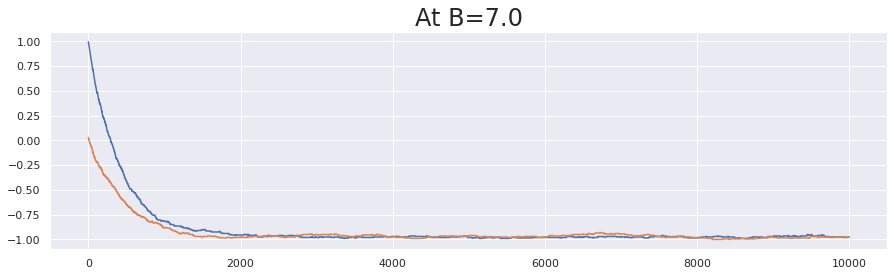

In [72]:

for count in range(0,15):
  L =20
  nrun = 10000
  T = 5.0
  U1 = cold_start(L) 
  U2 = hot_start(L)
  B=count*0.5
  M1,U1,HH = Thermalization(U1,T,nrun,0)
  M2,U2,HH = Thermalization(U2,T,nrun,0)
  X = np.arange(0,len(M1),1)
  
  
  plt.figure(figsize=(15,4))

  
  plt.title('At B={}'.format(B),fontsize='24')
  plt.plot(X,M1,"-")
  plt.plot(X,M2,"-")
  plt.show()
  


Spins are flipping down (-1) at high B over long runs.

### References

1. http://micro.stanford.edu/~caiwei/me334/Chap12_Ising_Model_v04.pdf
2. http://physics.drexel.edu/~valliere/PHYS305/Monte_Carlo/Monte_Carlo_story/node12.html
3. https://www.ibiblio.org/e-notes/Perc/ising.htm
4. https://arxiv.org/abs/2002.00615
5. http://farside.ph.utexas.edu/teaching/329/lectures/node110.html